## Kütüphaneler

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Veri Seti

In [7]:
df = pd.read_csv("./USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.8+ KB


In [10]:
#50 adet gözlem birimi varmış, 4 adet değişken var ve hepsi sayısaş değişken

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

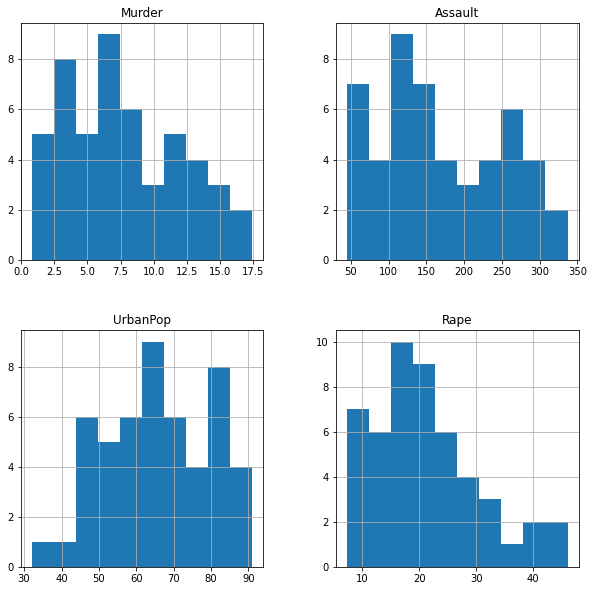

In [13]:
df.hist(figsize=(10,10))

In [17]:
kmeans = KMeans(n_clusters=4)

In [18]:
kmeans

KMeans(n_clusters=4)

In [19]:
k_fit = kmeans.fit(df)

In [20]:
k_fit.n_clusters #küme sayısı

4

In [24]:
k_fit.cluster_centers_ #kümeleriin merkezleri

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [25]:
k_fit.labels_ #gözlemlerin sınıfları

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 1, 0, 1,
       3, 1, 0, 2, 2, 1, 3, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 3, 0, 0, 2,
       3, 0, 0, 3, 3, 0])

## Kümelerin Görselleştirilmesi

In [27]:
#değişken sayısını ikiye indirgiyoruz.

In [28]:
k_means = KMeans(n_clusters = 2).fit(df)

In [29]:
kumeler = k_means.labels_

In [30]:
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [31]:
#iloc=bağımsız bir şekilde listelere benzer satır ve sütunlardan seçim yapabilme imkanı verir.
#loc=indexlere isimlere bağımlı olarak seçme işlemi için kullanılır.

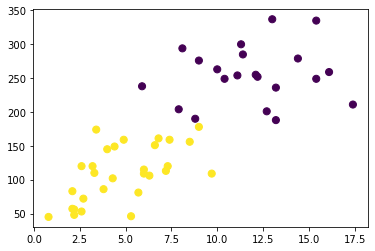

In [43]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis");

In [44]:
merkezler = k_means.cluster_centers_ #merkezleri kümelerin üzerine işaretleyelim.

In [45]:
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

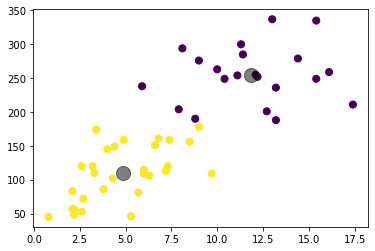

In [46]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis");
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5);

## Optimum Küme Sayısının Belirlenmesi

### Elbow Yöntemi

In [49]:
#amacımız amerakidaki suç istatiklerini belirli bir segmentlere göre ayırmak

In [50]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [52]:
ssd= []#ssd=uzaklık farklarının karelerinin toplamı
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

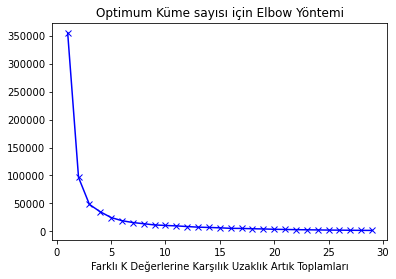

In [53]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [ ]:
#kümeleme sayısının gözlem biriminden az olması gerekiyor her zaman.

In [54]:
!pip install yellowbrick

In [55]:
from yellowbrick.cluster import KElbowVisualizer

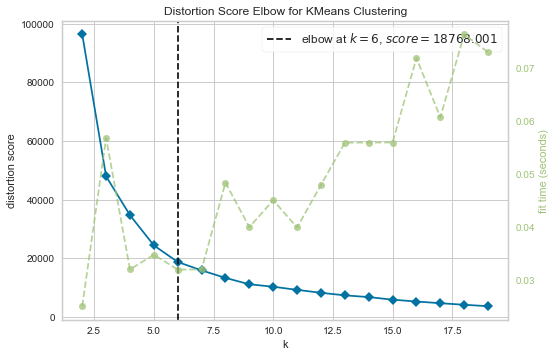

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2,20))
visu.fit(df)
visu.poof()

In [57]:
#kümeyi 6 ya ayırmayı en optimum değer olarak vermiş.

In [58]:
kmeans = KMeans(n_clusters = 4).fit(df)
kmeans

KMeans(n_clusters=4)

In [59]:
kumeler = kmeans.labels_

In [60]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,2


In [61]:
df["Kume_No"] = kumeler

In [62]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,2


## Hiyerarşik Kümeleme

In [64]:
from scipy.cluster.hierarchy import linkage

In [66]:
hc_complete = linkage(df, "complete") #dendrogram oluşturmak için kullanıyoruz, hiyerarşik kümeleri uygulamak için
hc_average = linkage(df, "average")

In [67]:
from scipy.cluster.hierarchy import dendrogram

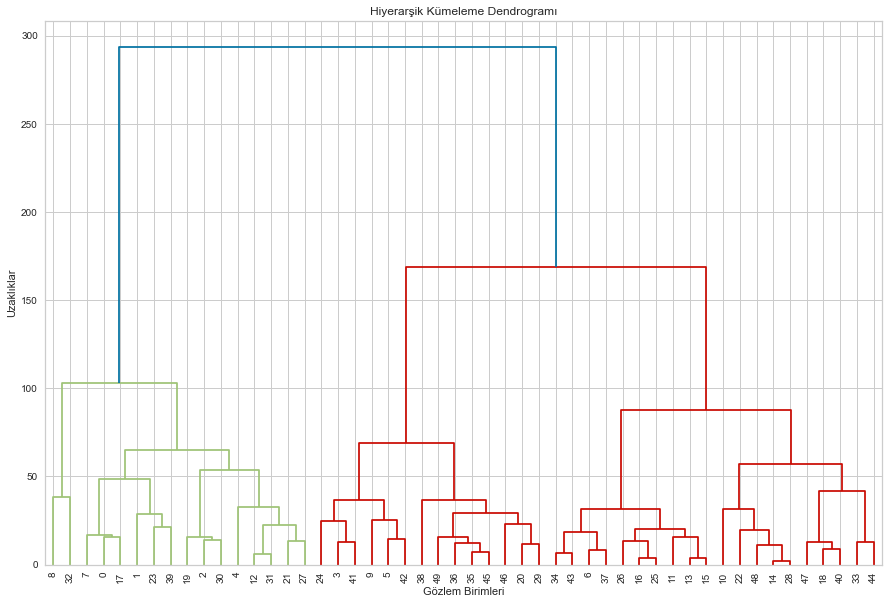

In [69]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
          leaf_font_size = 10);

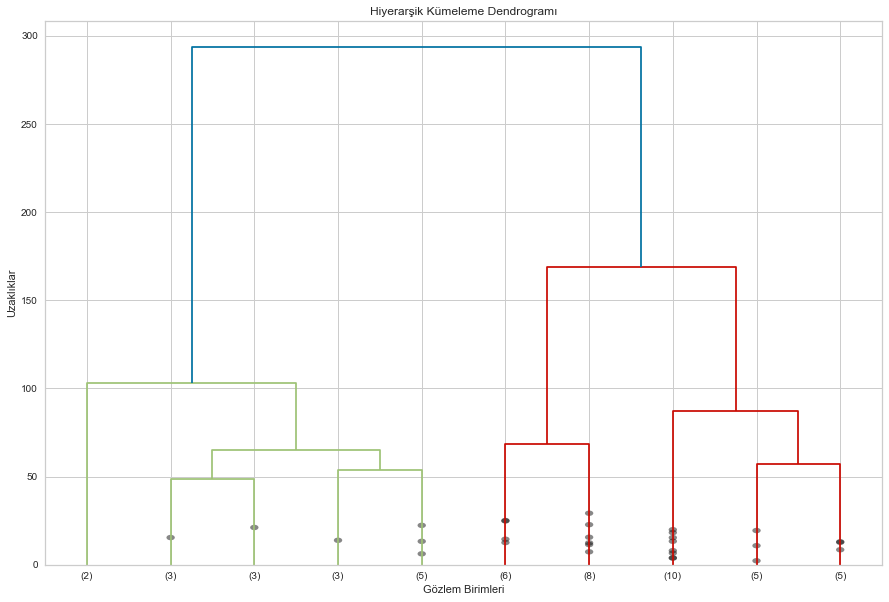

In [72]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp", #en son p adet göster
           p = 10,
           show_contracted = True, #kümelemeler yapıldığında kaçar tane eleman olduğu bilgisini getir.
          leaf_font_size = 10);

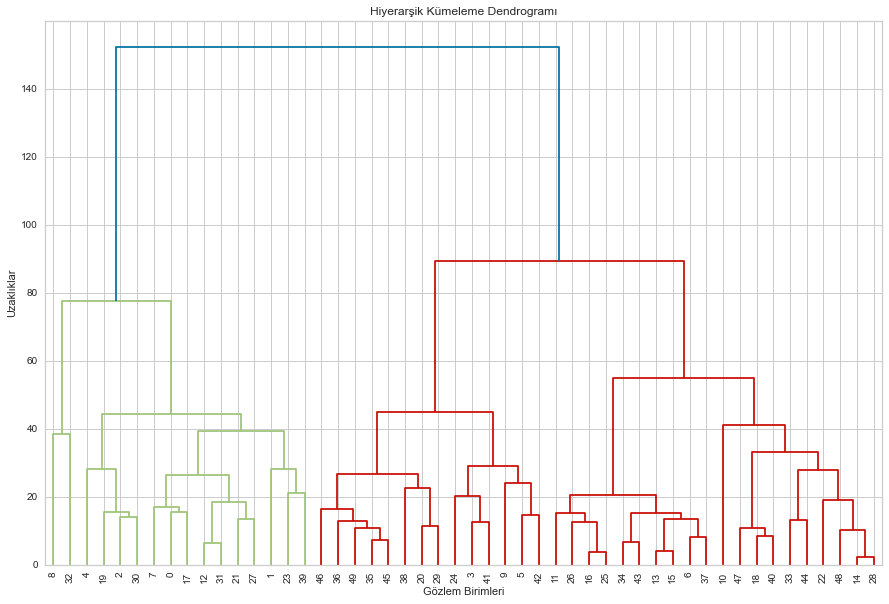

In [73]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          leaf_font_size = 10);

## Temel Bileşen Analizi

In [75]:
df = pd.read_csv("./Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data() #sadece sayısal değişkenleri seçer.
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [77]:
#amacımız değişken sayısını indirgeyerek temsil etmeye çalışmak

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
df = StandardScaler().fit_transform(df) #standartlaştırıyoruz.

In [80]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components=2) #temel bileşen indirgeme işlemi.n_components=kaç bileşene indirgemek istediğinin bilgisi
pca_fit = pca.fit_transform(df) #pca'yı verimize uygulama işlemi

In [85]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen", "ikinci_bilesen"])

In [86]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [89]:
pca.explained_variance_ratio_ #açıklanan varyans

array([0.45245466, 0.24246801])

In [91]:
#birinci bileşence veri setinin içinde bulunan değişkenliğin %45i açıklanabilmiş.
#ikinci bileşence veri setinin içinde bulunan değişkenliğin %24ü açıklanabilmiş.
#toplamda veri setinin ortalama %70ini açıklayabildiğimiz anlamına gelir. 

In [92]:
pca.components_ #bileşenlere erişmek için

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611]])

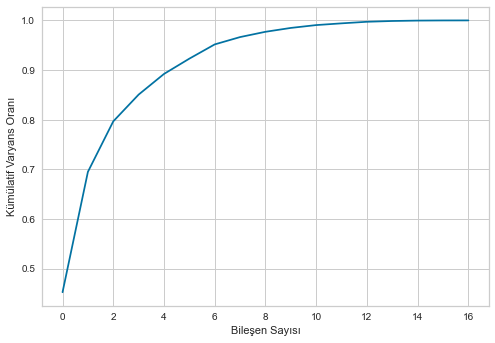

In [96]:
#optimum bileşen sayısı
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı");

In [97]:
#final
pca = PCA(n_components=3) 
pca_fit = pca.fit_transform(df)

In [98]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])

In [99]:
#yaklaşık olarak toplamda %80ini açıklamıştır.